<a href="https://colab.research.google.com/github/Sharif1813/Data-Science/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing different libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
#read the data at first
data = pd.read_csv("/content/MP2_Data.csv")

In [ ]:
#view some data
data.head()

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,ML-2020-1,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,...,0,5,4,0,4,8,6,1,0,4
1,ML-2020-2,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,...,8,5,2,0,0,25,3,2,5,4
2,ML-2020-3,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,...,0,8,2,0,0,9,0,1,0,3
3,ML-2020-4,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,...,4,10,0,0,0,7,6,0,0,3
4,ML-2020-6,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,...,6,8,5,1,1,5,3,1,0,2


In [ ]:
#distribution of data
data['Grade'].describe()

count    107.000000
mean       2.074766
std        1.993863
min        0.000000
25%        0.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Grade, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


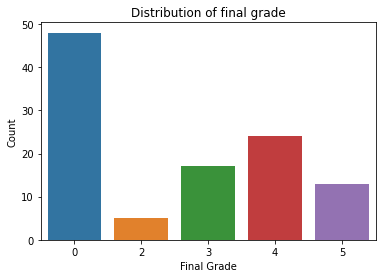

In [ ]:
#graph plotting for distribution of final grade
b = sns.countplot(data['Grade'])
b.axes.set_title('Distribution of final grade')
b.set_xlabel('Final Grade')
b.set_ylabel('Count')
plt.show()

In [ ]:
#check if null
data.isnull().any()

ID             False
Week2_Quiz1    False
Week3_MP1      False
Week3_PR1      False
Week5_MP2      False
Week5_PR2      False
Week7_MP3      False
Week7_PR3      False
Week4_Quiz2    False
Week6_Quiz3    False
Week8_Total    False
Week1_Stat0    False
Week1_Stat1    False
Week1_Stat2    False
Week1_Stat3    False
Week2_Stat0    False
Week2_Stat1    False
Week2_Stat2    False
Week2_Stat3    False
Week3_Stat0    False
Week3_Stat1    False
Week3_Stat2    False
Week3_Stat3    False
Week4_Stat0    False
Week4_Stat1    False
Week4_Stat2    False
Week4_Stat3    False
Week5_Stat0    False
Week5_Stat1    False
Week5_Stat2    False
Week5_Stat3    False
Week6_Stat0    False
Week6_Stat1    False
Week6_Stat2    False
Week6_Stat3    False
Week7_Stat0    False
Week7_Stat1    False
Week7_Stat2    False
Week7_Stat3    False
Week8_Stat0    False
Week8_Stat1    False
Week8_Stat2    False
Week8_Stat3    False
Week9_Stat0    False
Week9_Stat1    False
Week9_Stat2    False
Week9_Stat3    False
Grade        

In [ ]:
data.isnull().sum()

ID             0
Week2_Quiz1    0
Week3_MP1      0
Week3_PR1      0
Week5_MP2      0
Week5_PR2      0
Week7_MP3      0
Week7_PR3      0
Week4_Quiz2    0
Week6_Quiz3    0
Week8_Total    0
Week1_Stat0    0
Week1_Stat1    0
Week1_Stat2    0
Week1_Stat3    0
Week2_Stat0    0
Week2_Stat1    0
Week2_Stat2    0
Week2_Stat3    0
Week3_Stat0    0
Week3_Stat1    0
Week3_Stat2    0
Week3_Stat3    0
Week4_Stat0    0
Week4_Stat1    0
Week4_Stat2    0
Week4_Stat3    0
Week5_Stat0    0
Week5_Stat1    0
Week5_Stat2    0
Week5_Stat3    0
Week6_Stat0    0
Week6_Stat1    0
Week6_Stat2    0
Week6_Stat3    0
Week7_Stat0    0
Week7_Stat1    0
Week7_Stat2    0
Week7_Stat3    0
Week8_Stat0    0
Week8_Stat1    0
Week8_Stat2    0
Week8_Stat3    0
Week9_Stat0    0
Week9_Stat1    0
Week9_Stat2    0
Week9_Stat3    0
Grade          0
dtype: int64

In [ ]:
#size of data table
data.shape

(107, 48)

In [ ]:
#dropping unnecessary data
data.drop(['Week1_Stat0', 'Week1_Stat1', 'Week1_Stat2', 'Week1_Stat3',
       'Week2_Stat0', 'Week2_Stat1', 'Week2_Stat2', 'Week2_Stat3',
       'Week3_Stat0', 'Week3_Stat1', 'Week3_Stat2', 'Week3_Stat3',
       'Week4_Stat0', 'Week4_Stat1', 'Week4_Stat2', 'Week4_Stat3',
       'Week5_Stat0', 'Week5_Stat1', 'Week5_Stat2', 'Week5_Stat3',
       'Week6_Stat0', 'Week6_Stat1', 'Week6_Stat2', 'Week6_Stat3',
       'Week7_Stat0', 'Week7_Stat1', 'Week7_Stat2', 'Week7_Stat3',
       'Week8_Stat0', 'Week8_Stat1', 'Week8_Stat2', 'Week8_Stat3',
       'Week9_Stat0', 'Week9_Stat1', 'Week9_Stat2', 'Week9_Stat3'], axis = 1, inplace = True)

In [ ]:
#view existing column
data.columns

Index(['ID', 'Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', 'Week5_MP2', 'Week5_PR2',
       'Week7_MP3', 'Week7_PR3', 'Week4_Quiz2', 'Week6_Quiz3', 'Week8_Total',
       'Grade'],
      dtype='object')

In [ ]:
#view some data
data.head()

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,Grade
0,ML-2020-1,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,82.97,4
1,ML-2020-2,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,82.43,4
2,ML-2020-3,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,79.44,3
3,ML-2020-4,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,80.65,3
4,ML-2020-6,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,67.68,2


In [ ]:
#existing data
data.shape

(79, 12)

In [ ]:
gpa5 = len(data[data['Grade']==5])
gpa4 = len(data[data['Grade']==4])
gpa3 = len(data[data['Grade']==3])
gpa2 = len(data[data['Grade']==2])
gpa1 = len(data[data['Grade']==1])
gpa0 = len(data[data['Grade']==0])
print('Total number of students got Grade 5 is: ', gpa5)
print('Total number of students got Grade 4 is: ', gpa4)
print('Total number of students got Grade 3 is: ', gpa3)
print('Total number of students got Grade 2 is: ', gpa2)
print('Total number of students got Grade 1 is: ', gpa1)
print('Total number of students got Grade 0 is: ', gpa0)

Total number of students got Grade 5 is:  13
Total number of students got Grade 4 is:  24
Total number of students got Grade 3 is:  17
Total number of students got Grade 2 is:  5
Total number of students got Grade 1 is:  0
Total number of students got Grade 0 is:  48


In [ ]:
#adding three quiz
data['Quiz'] = data['Week2_Quiz1'] + data['Week4_Quiz2'] + data['Week6_Quiz3']

In [ ]:
#adding three projects
data['Project'] = data['Week3_MP1'] + data['Week5_MP2'] + data['Week7_MP3']

In [ ]:
#adding three review
data['Review'] = data['Week3_PR1'] + data['Week5_PR2'] + data['Week7_PR3']

In [ ]:
#total marks count
data['Total_Marks'] = data['Quiz'] + data['Project'] + data['Review']

In [ ]:
data.shape

(107, 51)

In [ ]:
data.head()

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,Grade,Quiz,Project,Review,Total_Marks
0,ML-2020-1,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,82.97,4,15.00,52.97,15.00,82.97
1,ML-2020-2,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,82.43,4,12.33,55.10,15.00,82.43
2,ML-2020-3,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,79.44,3,11.67,55.27,12.50,79.44
3,ML-2020-4,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,80.65,3,10.63,55.02,15.00,80.65
4,ML-2020-6,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,67.68,2,9.67,43.08,14.93,67.68


In [ ]:
#function to predict grade
def find_grade(data):
  grades = []

  for row in data['Total_Marks']:
    if row >= (0.9 * data['Total_Marks'].max()):
      grades.append('5')
    elif row >= (0.8 * data['Total_Marks'].max()):
      grades.append('4')
    elif row >= (0.7 * data['Total_Marks'].max()):
      grades.append('3')
    elif row >= (0.6 * data['Total_Marks'].max()):
      grades.append('2')
    elif row >= (0.6 * data['Total_Marks'].max()):
      grades.append('1')
    elif row < (0.5 * data['Total_Marks'].max()):
      grades.append('0')
  data['Total_Marks'] = grades

In [ ]:
#random number seed
np.random.seed()

In [ ]:
#training data
data['is_train'] = np.random.uniform(0,1, len(data))<= 0.75
data.head()

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,Grade,Quiz,Project,Review,Total_Marks,is_train
0,ML-2020-1,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,82.97,4,15.00,52.97,15.00,82.97,True
1,ML-2020-2,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,82.43,4,12.33,55.10,15.00,82.43,True
2,ML-2020-3,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,79.44,3,11.67,55.27,12.50,79.44,True
3,ML-2020-4,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,80.65,3,10.63,55.02,15.00,80.65,False
4,ML-2020-6,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,67.68,2,9.67,43.08,14.93,67.68,True


In [ ]:
#creating new two dataFrames
train, test = data[data['is_train']==True], data[data['is_train']==False]

In [ ]:
print('Number of trained data: ', len(train))
print('Number of tested data: ', len(test))

Number of trained data:  83
Number of tested data:  24


In [ ]:
#create feature
features = data.columns[1:10]
features

Index(['Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', 'Week5_MP2', 'Week5_PR2',
       'Week7_MP3', 'Week7_PR3', 'Week4_Quiz2', 'Week6_Quiz3'],
      dtype='object')

In [ ]:
y = pd.factorize(train['Grade'])[0]
y

array([0, 0, 1, 2, 1, 3, 4, 0, 1, 3, 4, 4, 0, 3, 1, 0, 3, 1, 1, 3, 0, 1,
       4, 3, 0, 1, 3, 1, 0, 4, 1, 4, 0, 0, 2, 4, 0, 1, 4, 0, 2, 2, 3, 0,
       1, 1, 3, 0, 1, 3, 1, 0, 4, 0, 0, 4, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
# Create a random forest Classifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(train[features], train['Grade'])

RandomForestClassifier(n_jobs=2, random_state=0)

In [ ]:
#classifier to train data
preds= clf.predict(test[features])
preds

array([4, 0, 5, 4, 3, 0, 0, 4, 3, 0, 0, 3, 4, 3, 5, 0, 0, 0, 4, 0, 0, 0,
       0, 0])

In [ ]:
#view the probabilities
clf.predict_proba(test[features])[0:10]

array([[0.01, 0.17, 0.26, 0.52, 0.04],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.01, 0.  , 0.11, 0.11, 0.77],
       [0.  , 0.01, 0.03, 0.75, 0.21],
       [0.01, 0.04, 0.51, 0.43, 0.01],
       [0.79, 0.08, 0.1 , 0.03, 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.03, 0.24, 0.58, 0.15],
       [0.31, 0.13, 0.44, 0.12, 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  ]])

In [ ]:
#confusion matrix
pd.crosstab(test['Grade'], preds, rownames=['Actual Grade'], colnames=['Predicted Grade'])

Predicted Grade,0,3,4,5
Actual Grade,,,,
0,13,0,0,0
2,0,1,0,0
3,0,1,1,0
4,0,1,4,0
5,0,1,0,2


In [ ]:
accuracy_score(test['Grade'],preds)

0.8333333333333334

In [ ]:
list(zip(train[features], clf.feature_importances_))

[('Week2_Quiz1', 0.05682443728712369),
 ('Week3_MP1', 0.1408579746756125),
 ('Week3_PR1', 0.024420043817712563),
 ('Week5_MP2', 0.21001698437741484),
 ('Week5_PR2', 0.06739476095158502),
 ('Week7_MP3', 0.32134418475856336),
 ('Week7_PR3', 0.029194985620594246),
 ('Week4_Quiz2', 0.12456213139556901),
 ('Week6_Quiz3', 0.0253844971158247)]

In [ ]:
X=data.iloc[:, 1:10]
Y=data.iloc[:, -2]

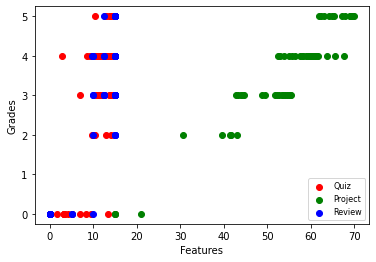

In [ ]:
#plot the graph
plt.xlabel('Features')
plt.ylabel('Grades')

pltX = data.loc[: , 'Quiz']
pltY = data.loc[:,'Grade']
plt.scatter(pltX, pltY, color='red', label='Quiz')

pltX = data.loc[:, 'Project']
pltY = data.loc[:,'Grade']
plt.scatter(pltX, pltY, color='green', label='Project')

pltX = data.loc[:, 'Review']
pltY = data.loc[:,'Grade']
plt.scatter(pltX, pltY, color='blue', label='Review')

plt.legend(loc=4, prop={'size':8})
plt.show()

In [ ]:
#data split
X = data.loc[:, data.columns != 'y']
y = data.loc[:, data.columns == 'y']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

AttributeError: ignored

In [ ]:
#training module
model = LogisticRegression()
model.fit(X_train, y_train)

ValueError: ignored

In [ ]:
#Testing
predictions = model.predict(X_test)
print(predictions)
print()
print( classification_report(y_test, predictions) )
print( accuracy_score(y_test, predictions))

ValueError: ignored